<a href="https://colab.research.google.com/github/s97616s97616/s97616s97616/blob/master/Fubon_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import warnings

warnings.filterwarnings("ignore")
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
link = "https://drive.google.com/open?id=1w6-_5k6pCMvXzg3oECV4m3IGyxElZzxn" 
fluff, id = link.split('=')
print (id) 

1w6-_5k6pCMvXzg3oECV4m3IGyxElZzxn


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  

# 1. Data clean

In [0]:
df_or = pd.read_csv('Filename.csv')

Due to the server and time limit, sample the dataset using unique ids.

In [52]:
uniq = pd.Series(df_or["ncodpers"].unique())
unique_id = uniq.sample(n=2000)
df = df_or[df_or.ncodpers.isin(unique_id)]
df.shape

(28779, 48)

Check NA in the whole dataset

In [53]:
df.isna().sum()

fecha_dato                   0
ncodpers                     0
ind_empleado                69
pais_residencia             69
sexo                        69
age                          0
fecha_alta                  69
ind_nuevo                   69
antiguedad                   0
indrel                      69
ult_fec_cli_1t           28719
indrel_1mes                297
tiprel_1mes                297
indresi                     69
indext                      69
conyuemp                 28761
canal_entrada              366
indfall                     69
tipodom                     69
cod_prov                   171
nomprov                    171
ind_actividad_cliente       69
renta                     5953
segmento                   368
ind_ahor_fin_ult1            0
ind_aval_fin_ult1            0
ind_cco_fin_ult1             0
ind_cder_fin_ult1            0
ind_cno_fin_ult1             0
ind_ctju_fin_ult1            0
ind_ctma_fin_ult1            0
ind_ctop_fin_ult1            0
ind_ctpp

The amount of NA is the same in some fields. I assert it
is a kind of systematic errors. Thus, Check this hypothesis using one of the columns.

In [54]:
df_ind=df[df["ind_empleado"].isnull()]
df_ind.isna().sum()

fecha_dato                0
ncodpers                  0
ind_empleado             69
pais_residencia          69
sexo                     69
age                       0
fecha_alta               69
ind_nuevo                69
antiguedad                0
indrel                   69
ult_fec_cli_1t           69
indrel_1mes              69
tiprel_1mes              69
indresi                  69
indext                   69
conyuemp                 69
canal_entrada            69
indfall                  69
tipodom                  69
cod_prov                 69
nomprov                  69
ind_actividad_cliente    69
renta                    69
segmento                 69
ind_ahor_fin_ult1         0
ind_aval_fin_ult1         0
ind_cco_fin_ult1          0
ind_cder_fin_ult1         0
ind_cno_fin_ult1          0
ind_ctju_fin_ult1         0
ind_ctma_fin_ult1         0
ind_ctop_fin_ult1         0
ind_ctpp_fin_ult1         0
ind_deco_fin_ult1         0
ind_deme_fin_ult1         0
ind_dela_fin_ult1   

Drop them directly. Though it is controversial to do in this way, the number of this systematic NA is not prominent compared to the whole dataset.

In [55]:
df_1=df.dropna(subset=["ind_empleado"])
df_1.isna().sum()

fecha_dato                   0
ncodpers                     0
ind_empleado                 0
pais_residencia              0
sexo                         0
age                          0
fecha_alta                   0
ind_nuevo                    0
antiguedad                   0
indrel                       0
ult_fec_cli_1t           28650
indrel_1mes                228
tiprel_1mes                228
indresi                      0
indext                       0
conyuemp                 28692
canal_entrada              297
indfall                      0
tipodom                      0
cod_prov                   102
nomprov                    102
ind_actividad_cliente        0
renta                     5884
segmento                   299
ind_ahor_fin_ult1            0
ind_aval_fin_ult1            0
ind_cco_fin_ult1             0
ind_cder_fin_ult1            0
ind_cno_fin_ult1             0
ind_ctju_fin_ult1            0
ind_ctma_fin_ult1            0
ind_ctop_fin_ult1            0
ind_ctpp

Drop the columns which are not going to use in model training. The reason why these columns are deleted is due to their complexity, monotonicity, and interpretation. Some of them have lots of classes or on the contrast, only one class in the column. On the other hand, some of them have no interpretation for the topic.

In [0]:
df_1.drop(["nomprov","tipodom","pais_residencia","fecha_alta","cod_prov","nomprov"],axis=1,inplace=True)

In the following part, start cleaning NA column by column.

In [57]:
df_1["ult_fec_cli_1t"].fillna(1,inplace=True)
df_1["ult_fec_cli_1t"][df_1["ult_fec_cli_1t"]!=1]=0
df_1["ult_fec_cli_1t"].value_counts()

1    28650
0       60
Name: ult_fec_cli_1t, dtype: int64

In [58]:
df_1["sexo"].fillna("X",inplace=True)
df_1["sexo"].value_counts()

V    15201
H    13509
Name: sexo, dtype: int64

In [59]:
df_1["indrel_1mes"].fillna(5,inplace=True)
df_1["indrel_1mes"].replace("P",6,inplace=True)
df_1["indrel_1mes"]=df_1["indrel_1mes"].astype(float)
df_1["indrel_1mes"]=df_1["indrel_1mes"].astype(str)
df_1["indrel_1mes"].value_counts()

1.0    28466
5.0      228
3.0       11
2.0        3
6.0        2
Name: indrel_1mes, dtype: int64

In [60]:
df_1["tiprel_1mes"].fillna("X",inplace=True)
df_1["tiprel_1mes"].value_counts()

I    14794
A    13675
X      228
P       11
R        2
Name: tiprel_1mes, dtype: int64

In [61]:
df_1["conyuemp"].fillna("N",inplace=True)
df_1["conyuemp"].value_counts()

N    28710
Name: conyuemp, dtype: int64

In [62]:
df_1["canal_entrada"].fillna("X",inplace=True)
df_1["canal_entrada"].replace(df_1["canal_entrada"].value_counts().keys()[3:],"X",inplace=True)
df_1["canal_entrada"].value_counts()

KHE    8352
X      6967
KAT    6806
KFC    6585
Name: canal_entrada, dtype: int64

In [63]:
df_1["segmento"].fillna("X",inplace=True)
df_1["segmento"].value_counts()

02 - PARTICULARES     16757
03 - UNIVERSITARIO    10269
01 - TOP               1385
X                       299
Name: segmento, dtype: int64

In [64]:
df_1["renta"].fillna(df_1["renta"].median(),inplace=True)
df_1["renta"].describe()

count    2.871000e+04
mean     1.324185e+05
std      2.375945e+05
min      1.647351e+04
25%      7.594107e+04
50%      1.034880e+05
75%      1.410722e+05
max      8.658967e+06
Name: renta, dtype: float64

In [65]:
df_1["ind_nomina_ult1"].fillna(0,inplace=True)
df_1["ind_nomina_ult1"].value_counts()

0.0    27056
1.0     1654
Name: ind_nomina_ult1, dtype: int64

In [66]:
df_1["ind_nom_pens_ult1"].fillna(0,inplace=True)
df_1["ind_nom_pens_ult1"].value_counts()

0.0    26876
1.0     1834
Name: ind_nom_pens_ult1, dtype: int64

In [67]:
df_1["month"] = pd.DatetimeIndex(df_1["fecha_dato"]).month
df_1["month"].value_counts()

5     3293
4     3282
3     3269
2     3257
1     3235
12    1908
11    1895
10    1875
9     1819
8     1775
7     1754
6     1348
Name: month, dtype: int64

count    28710.000000
mean        40.206827
std         16.906228
min          4.000000
25%         24.000000
50%         39.000000
75%         50.000000
max        103.000000
Name: age, dtype: float64


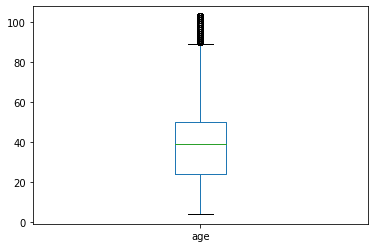

In [68]:
df_1["age"] = pd.to_numeric(df["age"], errors="coerce")
print(df_1["age"].describe())
df_1["age"].plot(kind="box")

count    28710.000000
mean        79.673563
std         65.943008
min          0.000000
25%         23.000000
50%         51.000000
75%        136.000000
max        256.000000
Name: antiguedad, dtype: float64


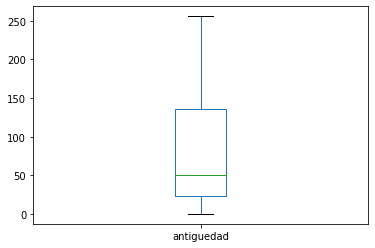

In [69]:
df_1["antiguedad"] = pd.to_numeric(df["antiguedad"], errors="coerce")
df_1.loc[df_1.antiguedad <= 0,"antiguedad"]=0
print(df_1["antiguedad"].describe())
df_1["antiguedad"].plot(kind="box")

# 2. Feature engineer

Generate time using "fecha_dato", it is also a index to partition the dataset.

In [70]:
df_1["time"]=(pd.DatetimeIndex(df_1["fecha_dato"]).year-2015)*12+pd.DatetimeIndex(df_1["fecha_dato"]).month
df_1["time"].describe()

count    28710.000000
mean         9.705782
std          4.775440
min          1.000000
25%          6.000000
50%         10.000000
75%         14.000000
max         17.000000
Name: time, dtype: float64

In [0]:
target_cols_all = ['ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1',
               'ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1',
               'ind_ctma_fin_ult1','ind_ctop_fin_ult1','ind_ctpp_fin_ult1',
               'ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1',
               'ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1',
               'ind_plan_fin_ult1','ind_pres_fin_ult1','ind_reca_fin_ult1',
               'ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1',
               'ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1']
target_cols_all_plus = ['ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1',
               'ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1',
               'ind_ctma_fin_ult1','ind_ctop_fin_ult1','ind_ctpp_fin_ult1',
               'ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1',
               'ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1',
               'ind_plan_fin_ult1','ind_pres_fin_ult1','ind_reca_fin_ult1',
               'ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1',
               'ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1','pro_have_sum']

"pro_have_sum" is the products a certain client has at certain moment.

In [72]:
df_1["pro_have_sum"]=df_1[target_cols_all].sum(1)
df_1["pro_have_sum"].describe()

count    28710.000000
mean         1.503030
std          1.567407
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         11.000000
Name: pro_have_sum, dtype: float64

Here is an interesting part. The original problem on Kaggle wants to predict the added products rather the products that clients already have. Thus, I transform the products' columns using t minus t-1 to generate this kind of dataset.

In [73]:
import numpy as np

np1=np.zeros(25)
for k in range(2,18):
  df_temp=df_1[df_1["time"]==(k-1)]
  df_ex=df_1[df_1["time"]==k]
  for i in range(len(df_ex["ncodpers"])):
    np2=np.zeros(25)
    for j in range(len(df_temp["ncodpers"])):
      if(df_ex.iloc[i,1]==df_temp.iloc[j,1]):
        np2=np.array(df_ex.iloc[i,19:43])-np.array(df_temp.iloc[j,19:43])
        sum_1=np.array(df_temp.iloc[j,45])
        np2=np.append(np2,sum_1)
        break
    np1=np.row_stack((np1,np2))

df_add=pd.DataFrame(np1)
df_add.drop(0,axis=0,inplace=True)
df_add.reset_index(drop=True,inplace=True)
df_add.columns=target_cols_all_plus
for i in target_cols_all_plus:
  df_add[i][df_add[i]<0]=0
print(df_add.shape)
df_add.head()

(27389, 25)


,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,pro_have_sum
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


Based on what I do in last cell, the first month then has no meaning in the model.

In [74]:
df_1=df_1[df_1["time"]>1]
print(df_1.shape)
df_1.head()

(27389, 46)


,fecha_dato,ncodpers,ind_empleado,sexo,age,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,month,time,pro_have_sum
625696,2015-02-28,544877,N,H,49.0,0.0,120.0,1.0,1,1.0,A,S,N,N,KAT,N,1.0,92120.46,01 - TOP,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1.0,1.0,1,2,2,6.0
626241,2015-02-28,542935,N,H,42.0,0.0,38.0,1.0,1,1.0,A,S,N,N,X,N,1.0,97627.32,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2,2,1.0
626517,2015-02-28,544451,N,H,38.0,0.0,51.0,1.0,1,1.0,A,S,N,N,KFC,N,1.0,161127.63,02 - PARTICULARES,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2,2,2.0
627752,2015-02-28,548373,N,H,59.0,0.0,119.0,1.0,1,1.0,A,S,N,N,KFC,N,1.0,293076.09,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2,2,1.0
630009,2015-02-28,539537,N,H,49.0,0.0,12.0,1.0,1,1.0,A,S,N,N,X,N,1.0,140949.06,01 - TOP,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2,2,1.0


Replace the original dataset.

In [75]:
df_1.drop(target_cols_all_plus,axis=1,inplace=True)
df_1.reset_index(drop=True,inplace=True)
df_1=pd.concat([df_1,df_add],axis=1)
print(df_1.shape)
df_1.head()

(27389, 46)


,fecha_dato,ncodpers,ind_empleado,sexo,age,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,ind_actividad_cliente,renta,segmento,month,time,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,pro_have_sum
0,2015-02-28,544877,N,H,49.0,0.0,120.0,1.0,1,1.0,A,S,N,N,KAT,N,1.0,92120.46,01 - TOP,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,2015-02-28,542935,N,H,42.0,0.0,38.0,1.0,1,1.0,A,S,N,N,X,N,1.0,97627.32,02 - PARTICULARES,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,2015-02-28,544451,N,H,38.0,0.0,51.0,1.0,1,1.0,A,S,N,N,KFC,N,1.0,161127.63,02 - PARTICULARES,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2015-02-28,548373,N,H,59.0,0.0,119.0,1.0,1,1.0,A,S,N,N,KFC,N,1.0,293076.09,02 - PARTICULARES,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2015-02-28,539537,N,H,49.0,0.0,12.0,1.0,1,1.0,A,S,N,N,X,N,1.0,140949.06,01 - TOP,2,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


Split out the dataset for training. Using "time">4 is becasuse I would like to use lag_3 of products in the model and also to keep the dataset of May.

In [76]:
df_tr=df_1[df_1["time"]>4]
df_tr.shape

(23386, 46)

Generate the total products bought by all the clients last month.

In [77]:
df_1[target_cols_all]=df_1[target_cols_all].astype(int)
df_g=df_1.groupby('time').sum()[target_cols_all]
df_g.columns=["last"+i for i in target_cols_all]
df_g=df_g[2:15]
df_g.reset_index(inplace=True)
df_g["time"]=df_g["time"]+1
df_com=df_tr.merge(df_g, how="left", left_on='time', right_on='time')
print(df_com.shape)
df_com.head()

(23386, 70)


,fecha_dato,ncodpers,ind_empleado,sexo,age,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,ind_actividad_cliente,renta,segmento,month,time,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,pro_have_sum,lastind_ahor_fin_ult1,lastind_aval_fin_ult1,lastind_cco_fin_ult1,lastind_cder_fin_ult1,lastind_cno_fin_ult1,lastind_ctju_fin_ult1,lastind_ctma_fin_ult1,lastind_ctop_fin_ult1,lastind_ctpp_fin_ult1,lastind_deco_fin_ult1,lastind_deme_fin_ult1,lastind_dela_fin_ult1,lastind_ecue_fin_ult1,lastind_fond_fin_ult1,lastind_hip_fin_ult1,lastind_plan_fin_ult1,lastind_pres_fin_ult1,lastind_reca_fin_ult1,lastind_tjcr_fin_ult1,lastind_valo_fin_ult1,lastind_viv_fin_ult1,lastind_nomina_ult1,lastind_nom_pens_ult1,lastind_recibo_ult1
0,2015-05-28,1061302,N,H,53.0,0.0,34.0,1.0,1,1.0,A,S,N,N,KHE,N,1.0,45696.75,02 - PARTICULARES,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7,0,9,0,0,0,0,0,0,4,2,0,0,0,0,1,6,1,0,6,13,19
1,2015-05-28,1061425,N,V,24.0,0.0,34.0,1.0,1,1.0,I,S,N,N,KHE,N,0.0,155655.03,03 - UNIVERSITARIO,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7,0,9,0,0,0,0,0,0,4,2,0,0,0,0,1,6,1,0,6,13,19
2,2015-05-28,1061011,N,V,23.0,0.0,34.0,1.0,1,1.0,I,S,N,N,KHE,N,0.0,103488.03,03 - UNIVERSITARIO,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7,0,9,0,0,0,0,0,0,4,2,0,0,0,0,1,6,1,0,6,13,19
3,2015-05-28,1062017,N,V,27.0,0.0,34.0,1.0,1,1.0,I,S,N,N,KHE,N,0.0,61760.61,03 - UNIVERSITARIO,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7,0,9,0,0,0,0,0,0,4,2,0,0,0,0,1,6,1,0,6,13,19
4,2015-05-28,1059398,N,H,24.0,0.0,18.0,1.0,1,1.0,I,S,N,N,KAT,N,0.0,80706.57,03 - UNIVERSITARIO,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7,0,9,0,0,0,0,0,0,4,2,0,0,0,0,1,6,1,0,6,13,19


Transform the original categorical features into one hot encoding.

In [78]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

one_hot_list=["ind_empleado", "sexo", "indrel", "indrel_1mes","tiprel_1mes","indresi","indext","conyuemp","canal_entrada","indfall","segmento"]
df_tr[one_hot_list]=df_tr[one_hot_list].astype(str)
lab_encoder = LabelEncoder()
for i in one_hot_list:
  df_tr[i]=lab_encoder.fit_transform(df_tr[i])

one_hot = OneHotEncoder(categories="auto",drop="first")
cat_to_onehot = pd.DataFrame(one_hot.fit_transform(df_tr[one_hot_list]).toarray())
cat_to_onehot.columns=one_hot.get_feature_names()

df_com.drop(one_hot_list,axis=1,inplace=True)
df_com=pd.concat([df_com,cat_to_onehot],axis=1)
df_com.head()

,fecha_dato,ncodpers,age,ind_nuevo,antiguedad,ult_fec_cli_1t,ind_actividad_cliente,renta,month,time,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,pro_have_sum,lastind_ahor_fin_ult1,lastind_aval_fin_ult1,lastind_cco_fin_ult1,lastind_cder_fin_ult1,lastind_cno_fin_ult1,lastind_ctju_fin_ult1,lastind_ctma_fin_ult1,lastind_ctop_fin_ult1,lastind_ctpp_fin_ult1,lastind_deco_fin_ult1,lastind_deme_fin_ult1,lastind_dela_fin_ult1,lastind_ecue_fin_ult1,lastind_fond_fin_ult1,lastind_hip_fin_ult1,lastind_plan_fin_ult1,lastind_pres_fin_ult1,lastind_reca_fin_ult1,lastind_tjcr_fin_ult1,lastind_valo_fin_ult1,lastind_viv_fin_ult1,lastind_nomina_ult1,lastind_nom_pens_ult1,lastind_recibo_ult1,x0_1,x1_1,x2_1,x3_1,x3_2,x3_3,x3_4,x4_1,x4_2,x4_3,x4_4,x5_1,x6_1,x8_1,x8_2,x8_3,x9_1,x10_1,x10_2,x10_3
0,2015-05-28,1061302,53.0,0.0,34.0,1,1.0,45696.75,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7,0,9,0,0,0,0,0,0,4,2,0,0,0,0,1,6,1,0,6,13,19,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2015-05-28,1061425,24.0,0.0,34.0,1,0.0,155655.03,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7,0,9,0,0,0,0,0,0,4,2,0,0,0,0,1,6,1,0,6,13,19,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2015-05-28,1061011,23.0,0.0,34.0,1,0.0,103488.03,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7,0,9,0,0,0,0,0,0,4,2,0,0,0,0,1,6,1,0,6,13,19,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,2015-05-28,1062017,27.0,0.0,34.0,1,0.0,61760.61,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7,0,9,0,0,0,0,0,0,4,2,0,0,0,0,1,6,1,0,6,13,19,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,2015-05-28,1059398,24.0,0.0,18.0,1,0.0,80706.57,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7,0,9,0,0,0,0,0,0,4,2,0,0,0,0,1,6,1,0,6,13,19,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Generate the products bought by specific clients' lag1-3 respectively. 

In [0]:
np1=np.zeros(24)
for k in range(5,18):
  df_temp=df_1[df_1["time"]==(k-1)]
  df_ex=df_1[df_1["time"]==k]
  for i in range(len(df_ex["ncodpers"])):
    np2=np.zeros(24)
    for j in range(len(df_temp["ncodpers"])):
      if(df_ex.iloc[i,1]==df_temp.iloc[j,1]):
        np2=np.array(df_temp.iloc[j,19:43])
        break
    np1=np.row_stack((np1,np2))

df_np=pd.DataFrame(np1)
df_np.drop(0,axis=0,inplace=True)
df_np.reset_index(drop=True,inplace=True)
df_np.columns=["t-1_"+str(i) for i in range(24)]

In [0]:
np1=np.zeros(24)
for k in range(5,18):
  df_temp=df_1[df_1["time"]==(k-2)]
  df_ex=df_1[df_1["time"]==k]
  for i in range(len(df_ex["ncodpers"])):
    np2=np.zeros(24)
    for j in range(len(df_temp["ncodpers"])):
      if(df_ex.iloc[i,1]==df_temp.iloc[j,1]):
        np2=np.array(df_temp.iloc[j,19:43])
        break
    np1=np.row_stack((np1,np2))

df_np2=pd.DataFrame(np1)
df_np2.drop(0,axis=0,inplace=True)
df_np2.reset_index(drop=True,inplace=True)
df_np2.columns=["t-2_"+str(i) for i in range(24)]

In [0]:
np1=np.zeros(24)
for k in range(5,18):
  df_temp=df_1[df_1["time"]==(k-3)]
  df_ex=df_1[df_1["time"]==k]
  for i in range(len(df_ex["ncodpers"])):
    np2=np.zeros(24)
    for j in range(len(df_temp["ncodpers"])):
      if(df_ex.iloc[i,1]==df_temp.iloc[j,1]):
        np2=np.array(df_temp.iloc[j,19:43])
        break
    np1=np.row_stack((np1,np2))

df_np3=pd.DataFrame(np1)
df_np3.drop(0,axis=0,inplace=True)
df_np3.reset_index(drop=True,inplace=True)
df_np3.columns=["t-3_"+str(i) for i in range(24)]

Generate total products bought by the specific clients.

In [82]:
col=["t-1_"+str(i) for i in range(24)]
df_com=pd.concat([df_com,df_np,df_np2,df_np3],axis=1)
df_com["pro_newbuy_sum"]=df_com[col].sum(1)
df_com.drop(["fecha_dato","ncodpers"],axis=1,inplace=True)
df_com=df_com.astype(float)
print(df_com.shape)
df_com.head()

(23386, 150)


,age,ind_nuevo,antiguedad,ult_fec_cli_1t,ind_actividad_cliente,renta,month,time,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,pro_have_sum,lastind_ahor_fin_ult1,lastind_aval_fin_ult1,lastind_cco_fin_ult1,lastind_cder_fin_ult1,lastind_cno_fin_ult1,lastind_ctju_fin_ult1,lastind_ctma_fin_ult1,...,t-2_9,t-2_10,t-2_11,t-2_12,t-2_13,t-2_14,t-2_15,t-2_16,t-2_17,t-2_18,t-2_19,t-2_20,t-2_21,t-2_22,t-2_23,t-3_0,t-3_1,t-3_2,t-3_3,t-3_4,t-3_5,t-3_6,t-3_7,t-3_8,t-3_9,t-3_10,t-3_11,t-3_12,t-3_13,t-3_14,t-3_15,t-3_16,t-3_17,t-3_18,t-3_19,t-3_20,t-3_21,t-3_22,t-3_23,pro_newbuy_sum
0,53.0,0.0,34.0,1.0,1.0,45696.75,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,24.0,0.0,34.0,1.0,0.0,155655.03,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
2,23.0,0.0,34.0,1.0,0.0,103488.03,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
3,27.0,0.0,34.0,1.0,0.0,61760.61,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
4,24.0,0.0,18.0,1.0,0.0,80706.57,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0


# 3. Model

Dataset split.

In [83]:
df_test=df_com[df_com["time"]==17]
y_test=df_test[target_cols_all]
df_test.drop(target_cols_all,axis=1,inplace=True)

df_train=df_com[df_com["time"]<16]
y_train=df_train[target_cols_all]
df_train.drop(target_cols_all,axis=1,inplace=True)

df_val=df_com[df_com["time"]==16]
y_val=df_val[target_cols_all]
df_val.drop(target_cols_all,axis=1,inplace=True)

df_last=df_com[df_com["time"]<17]
y_last=df_last[target_cols_all]
df_last.drop(target_cols_all,axis=1,inplace=True)

print(df_train.shape)
print(df_val.shape)
print(df_last.shape)
print(df_test.shape)

(19487, 126)
(1945, 126)
(21432, 126)
(1954, 126)


Use the mean of label to determine the threshold (the count of purchase). Split two label sets for two models. 

In [84]:
thre=0.0001
df_th=pd.DataFrame(y_train.mean().sort_values())
biglist=list(df_th[df_th[0]>thre].index)
biglist

['ind_ctop_fin_ult1',
 'ind_fond_fin_ult1',
 'ind_ctju_fin_ult1',
 'ind_deco_fin_ult1',
 'ind_valo_fin_ult1',
 'ind_ctma_fin_ult1',
 'ind_reca_fin_ult1',
 'ind_dela_fin_ult1',
 'ind_ecue_fin_ult1',
 'ind_cno_fin_ult1',
 'ind_tjcr_fin_ult1',
 'ind_cco_fin_ult1',
 'ind_nomina_ult1',
 'ind_nom_pens_ult1',
 'ind_recibo_ult1']

In [0]:
df_train=df_train.astype(float)
df_test=df_test.astype(float)
df_val=df_val.astype(float)
df_last=df_last.astype(float)
y_train=y_train.astype(float)
y_test=y_test.astype(float)
y_val=y_val.astype(float)
y_last=y_last.astype(float)

y_test_big=y_test[biglist]
y_test_small=y_test.drop(biglist,axis=1)
y_test_big=y_test_big.astype(float)
y_test_small=y_test_small.astype(float)

y_train_big=y_train[biglist]
y_train_small=y_train.drop(biglist,axis=1)
y_train_big=y_train_big.astype(float)
y_train_small=y_train_small.astype(float)

y_last_big=y_last[biglist]
y_last_small=y_last.drop(biglist,axis=1)
y_last_big=y_last_big.astype(float)
y_last_small=y_last_small.astype(float)

y_val_big=y_val[biglist]
y_val_small=y_val.drop(biglist,axis=1)
y_val_big=y_val_big.astype(float)
y_val_small=y_val_small.astype(float)

y_test_formulti=pd.concat([y_test_big,y_test_small],axis=1)

In [0]:
del df_com,df_1,df_tr,df_add,df_ind,df_ex,df_g,df_temp

Define the evaluation metrics as Kaggle.

In [0]:
def metrics(pred,y_test):
  pred=pd.DataFrame(pred)
  tp_fp=pred.sum(1)
  tplist=[]
  for i in range(len(pred)):
    count=0
    for j in range(len(pred.columns)):
      if(pred.iloc[i,j]==1 and y_test.iloc[i,j]==1):
        count+=1
    tplist.append(count)
  div=[]
  tplist=pd.Series(tplist)
  for i in range(len(tplist)):
    if(tp_fp[i]==0):
      prec=0
    else:
      prec=tplist[i]/tp_fp[i]
    div.append(prec)
  div=pd.Series(div)
  prec=div.mean()
  return prec

24 models for 24 labels.

In [88]:
from xgboost import XGBClassifier

flag=0
for i in y_last.columns:
  clf = XGBClassifier(learning_rate=0.4,max_depth=6,gamma=100)
  y=y_last[i]
  clf.fit(df_last,y)
  pred=clf.predict(df_test)
  if(flag==0):
    first=pd.DataFrame(pred)
    flag+=1
  else:
    pred=pd.DataFrame(pred)
    first=pd.concat([first,pred],axis=1)

first.columns=target_cols_all
print(metrics(first,y_test))

0.0


Base rate

In [89]:
one=first
one.replace(1,0,inplace=True)
one.columns=target_cols_all
print(metrics(one,y_test))

0.0


Xgboost hyperparameter tuning and model construct.

In [90]:
from sklearn.multiclass import OneVsRestClassifier

learning_rate=[0.2,0.3,0.4]
max_depth=[6,7,5]
gamma=[0,10,100]
scorelist=[]

def xgb(x,y,xt,yt):
  for i in learning_rate:
    for j in max_depth:
      for k in gamma:
        clf = OneVsRestClassifier(XGBClassifier(learning_rate=i,max_depth=j,gamma=k))
        clf.fit(x,y)
        pred=clf.predict(xt)
        scorelist.append(metrics(pred,yt))

  print(scorelist.index(max(scorelist)))
  print(max(scorelist))

xgb(df_train,y_train,df_val,y_val)

24
0.002313624678663239


In [91]:
def xgbb(x,y,xt):
  clf = OneVsRestClassifier(XGBClassifier(learning_rate=0.4,max_depth=5,gamma=0))
  clf.fit(x,y)
  pred=clf.predict(xt)
  return pred

print("single-xgb:")
print(metrics(xgbb(df_last,y_last,df_test),y_test))
pred_big = pd.DataFrame(xgbb(df_last,y_last_big,df_test))
pred_small = pd.DataFrame(xgbb(df_last,y_last_small,df_test))
pred=pd.concat([pred_big,pred_small],axis=1)
print("multi-xgb:")
print(metrics(pred,y_test_formulti))

single-xgb:
0.004605936540429887
multi-xgb:
0.004605936540429887


LogisticRegression hyperparameter tuning and model construct.

In [92]:
from sklearn.linear_model import LogisticRegression

tol=[1e-4,1e-3,1e-5]
C=[1,2]
scorelist=[]

def log(x,y,xt,yt):
  for i in tol:
    for j in C:
      clf = OneVsRestClassifier(LogisticRegression(tol=i,C=j))
      clf.fit(x,y)
      pred=clf.predict(xt)
      scorelist.append(metrics(pred,yt))

  print(scorelist.index(max(scorelist)))
  print(max(scorelist))

log(df_train,y_train,df_val,y_val)

0
0.0


In [93]:
def logg(x,y,xt):
  clf = OneVsRestClassifier(LogisticRegression())
  clf.fit(x,y)
  pred=clf.predict(xt)
  return pred

print("single-log:")
print(metrics(logg(df_last,y_last,df_test),y_test))
pred_big = pd.DataFrame(logg(df_last,y_last_big,df_test))
pred_small = pd.DataFrame(logg(df_last,y_last_small,df_test))
pred=pd.concat([pred_big,pred_small],axis=1)
print("multi-log:")
print(metrics(pred,y_test_formulti))

single-log:
0.0
multi-log:
0.0


RandomForestClassifier hyperparameter tuning and model construct.

In [94]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier

n_estimators=[50,100,150]
scorelist=[]

def ran(x,y,xt,yt):
  for i in n_estimators:
    clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=i))
    clf.fit(x,y)
    pred=clf.predict(xt)
    scorelist.append(metrics(pred,yt))

  print(scorelist.index(max(scorelist)))
  print(max(scorelist))

ran(df_train,y_train,df_val,y_val)

0
0.0


In [95]:
def rann(x,y,xt):
  clf = OneVsRestClassifier(RandomForestClassifier())
  clf.fit(x,y)
  pred=clf.predict(xt)
  return pred

print("single-ran:")
print(metrics(rann(df_last,y_last,df_test),y_test))
pred_big = pd.DataFrame(rann(df_last,y_last_big,df_test))
pred_small = pd.DataFrame(rann(df_last,y_last_small,df_test))
pred=pd.concat([pred_big,pred_small],axis=1)
print("multi-ran:")
print(metrics(pred,y_test_formulti))

single-ran:
0.0
multi-ran:
0.0


Ensemble using VotingClassifier

In [96]:
def vote(x,y,xt):
    clf1 = OneVsRestClassifier(XGBClassifier(learning_rate=0.4,max_depth=7,gamma=0))
    clf2 = OneVsRestClassifier(RandomForestClassifier(n_estimators=150))
    clf3 = OneVsRestClassifier(LogisticRegression())
    eclf = OneVsRestClassifier(VotingClassifier(estimators=[('1', clf1), ('2', clf2), ('3', clf3)],voting="soft"))
    eclf.fit(x,y)
    pred=eclf.predict(xt)
    return pred

print("single-vote:")
print(metrics(vote(df_last,y_last,df_test),y_test))
pred_big = pd.DataFrame(vote(df_last,y_last_big,df_test))
pred_small = pd.DataFrame(vote(df_last,y_last_small,df_test))
pred=pd.concat([pred_big,pred_small],axis=1)
print("multi-vote:")
print(metrics(pred,y_test_formulti))

single-vote:
0.0
multi-vote:
0.0
